In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
data = './PlantVillage'
classes = []
for d in os.listdir(data):
    classes.append(d)
classes

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold']

In [8]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
DATA_DIR = './PlantVillage'

datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.3  # 70% training, 30% for validation/test
)

train_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # 70% for training
)

# Validation and Test Data
test_val_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.5  # Split remaining 30% into 15% validation and 15% test
)

validation_generator = test_val_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',  # 15% validation
    shuffle=False  # Ensures consistency during evaluation
)

test_generator = test_val_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',  # 15% test
    shuffle=False
)


Found 7321 images belonging to 9 classes.
Found 5226 images belonging to 9 classes.
Found 5229 images belonging to 9 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


d:\Anaconda\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=10
)

Epoch 1/10


d:\Anaconda\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


228/228 ━━━━━━━━━━━━━━━━━━━━ 126s 543ms/step - accuracy: 0.3672 - loss: 1.7358 - val_accuracy: 0.7379 - val_loss: 0.7314
Epoch 2/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.8125 - loss: 0.4680 - val_accuracy: 0.6000 - val_loss: 1.2161
Epoch 3/10


d:\Anaconda\anaconda3\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


228/228 ━━━━━━━━━━━━━━━━━━━━ 87s 379ms/step - accuracy: 0.7223 - loss: 0.7898 - val_accuracy: 0.8466 - val_loss: 0.4499
Epoch 4/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.8125 - loss: 0.5943 - val_accuracy: 0.8000 - val_loss: 0.6336
Epoch 5/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 85s 371ms/step - accuracy: 0.7974 - loss: 0.5900 - val_accuracy: 0.8815 - val_loss: 0.3563
Epoch 6/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.9062 - loss: 0.3191 - val_accuracy: 0.8000 - val_loss: 0.5581
Epoch 7/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 83s 362ms/step - accuracy: 0.8410 - loss: 0.4391 - val_accuracy: 0.8476 - val_loss: 0.4276
Epoch 8/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - accuracy: 0.7188 - loss: 0.6988 - val_accuracy: 0.8000 - val_loss: 0.3601
Epoch 9/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 82s 356ms/step - accuracy: 0.8567 - loss: 0.3983 - val_accuracy: 0.9116 - val_loss: 0.2672
Epoch 10/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - accuracy: 0.8750 - loss: 0.3607 - val_ac

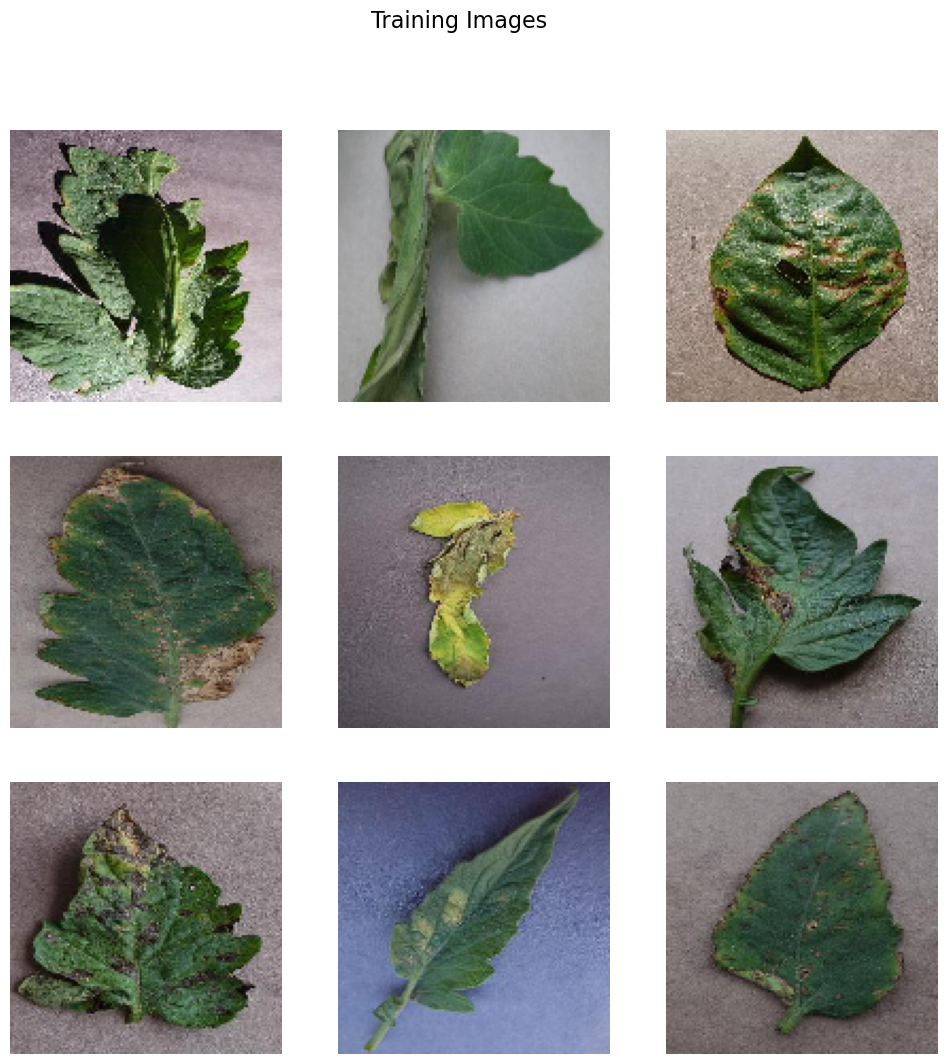

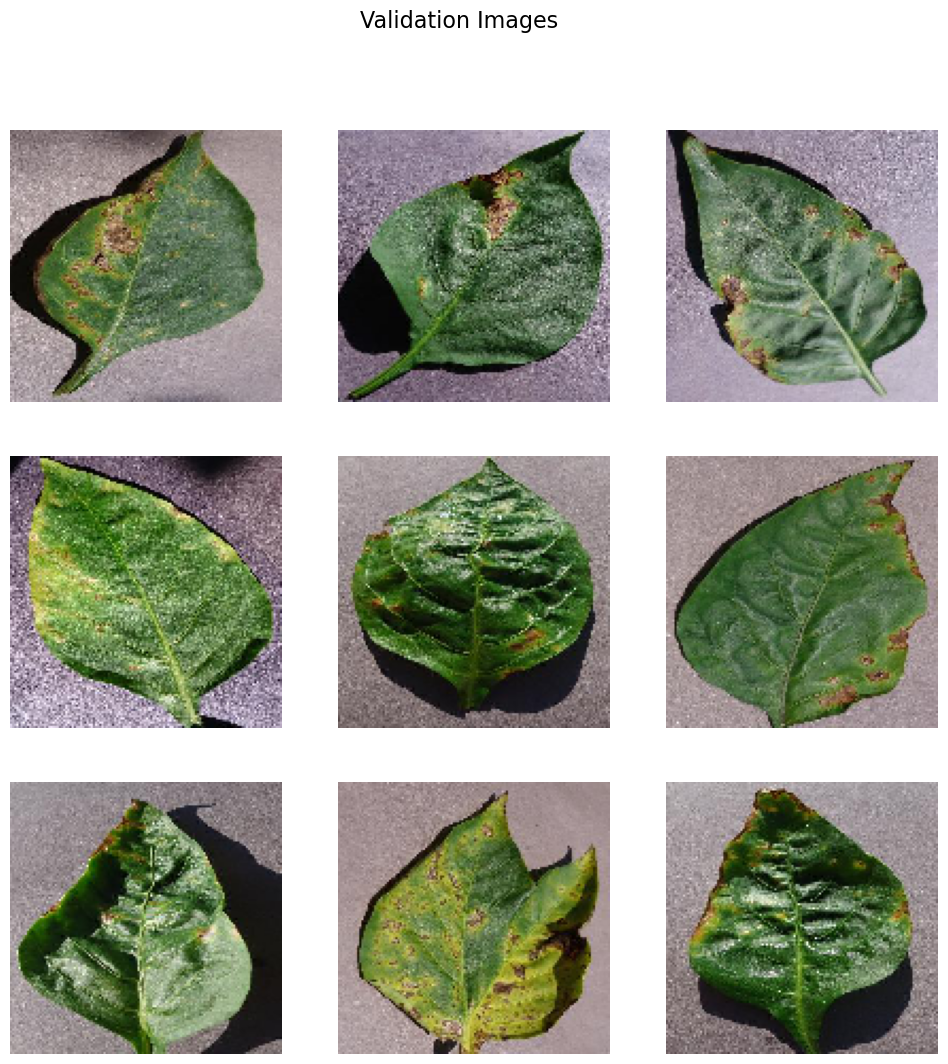

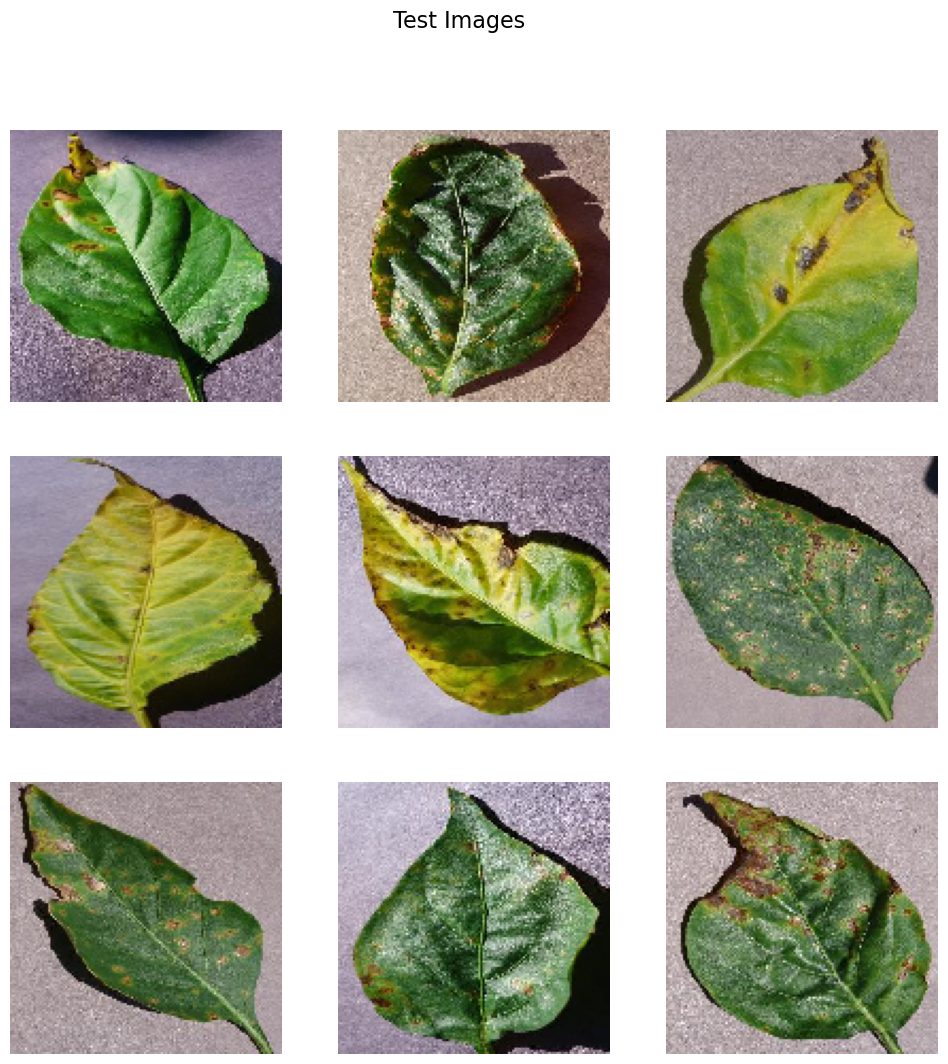

In [12]:
import matplotlib.pyplot as plt
def plot_images(generator, title):
    # Get a batch of images and labels
    images, labels = next(generator)

    # Plot images in a grid
    plt.figure(figsize=(12, 12))
    plt.suptitle(title, fontsize=16)
    for i in range(9):  # Display first 9 images in the batch
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

# Display a batch of images from each generator
plot_images(train_generator, "Training Images")
plot_images(validation_generator, "Validation Images")
plot_images(test_generator, "Test Images")

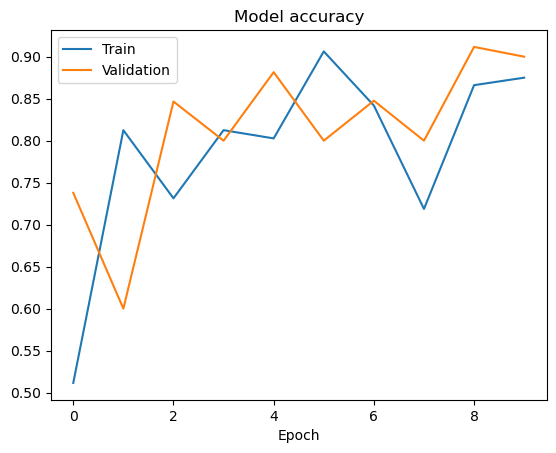

In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [16]:
# Evaluate Model on Test Set
test_generator.reset()
predictions = model.predict(test_generator)  # Generate predictions for all test samples
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes[:len(predicted_classes)]  # Ensure matching lengths

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(true_classes, predicted_classes)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
class_report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())

# Print Results
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


164/164 ━━━━━━━━━━━━━━━━━━━━ 23s 141ms/step
Test Accuracy: 94.26%
Confusion Matrix:
[[ 484    7    0    3    0    2    0    2    1]
 [   6  721    0    3    5    2    0    2    0]
 [   3    0  476   20    0    0    0    1    0]
 [   3    0    0  479    0    9    0    8    1]
 [   3    1    0   11   61    0    0    0    0]
 [   0    0    0    0    0 1059    0    5    0]
 [   6    0    1    5    1   37  425   22    3]
 [   5    0    3   61    0    6   26  848    6]
 [   2    0    0    3    0    1    0   14  376]]
Classification Report:
                               precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       0.95      0.97      0.96       499
       Pepper__bell___healthy       0.99      0.98      0.98       739
        Potato___Early_blight       0.99      0.95      0.97       500
         Potato___Late_blight       0.82      0.96      0.88       500
             Potato___healthy       0.91      0.80      0.85        76
        Tomato_Bacterial_spot    

In [18]:
# Evaluate Model on Test Set
# Ensure class labels match the available data
print(true_classes)
available_labels = np.unique(true_classes)
target_names = [list(test_generator.class_indices.keys())[i] for i in available_labels]

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(true_classes, predicted_classes)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
class_report = classification_report(true_classes, predicted_classes, target_names=target_names)

# Print Results
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


[0 0 0 ... 8 8 8]
Test Accuracy: 94.26%
Confusion Matrix:
[[ 484    7    0    3    0    2    0    2    1]
 [   6  721    0    3    5    2    0    2    0]
 [   3    0  476   20    0    0    0    1    0]
 [   3    0    0  479    0    9    0    8    1]
 [   3    1    0   11   61    0    0    0    0]
 [   0    0    0    0    0 1059    0    5    0]
 [   6    0    1    5    1   37  425   22    3]
 [   5    0    3   61    0    6   26  848    6]
 [   2    0    0    3    0    1    0   14  376]]
Classification Report:
                               precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       0.95      0.97      0.96       499
       Pepper__bell___healthy       0.99      0.98      0.98       739
        Potato___Early_blight       0.99      0.95      0.97       500
         Potato___Late_blight       0.82      0.96      0.88       500
             Potato___healthy       0.91      0.80      0.85        76
        Tomato_Bacterial_spot       0.95      1.00      0.9

In [19]:
np.unique(predicted_classes)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [20]:
# Print Results
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Test Accuracy: 94.26%
Confusion Matrix:
[[ 484    7    0    3    0    2    0    2    1]
 [   6  721    0    3    5    2    0    2    0]
 [   3    0  476   20    0    0    0    1    0]
 [   3    0    0  479    0    9    0    8    1]
 [   3    1    0   11   61    0    0    0    0]
 [   0    0    0    0    0 1059    0    5    0]
 [   6    0    1    5    1   37  425   22    3]
 [   5    0    3   61    0    6   26  848    6]
 [   2    0    0    3    0    1    0   14  376]]
Classification Report:
                               precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       0.95      0.97      0.96       499
       Pepper__bell___healthy       0.99      0.98      0.98       739
        Potato___Early_blight       0.99      0.95      0.97       500
         Potato___Late_blight       0.82      0.96      0.88       500
             Potato___healthy       0.91      0.80      0.85        76
        Tomato_Bacterial_spot       0.95      1.00      0.97      1064
      

In [21]:
model.save('plant_disease_model.h5')


In [22]:
import numpy as np
labelsx = []
# Print image batch and class names for each label
for images, labels in train_generator:
    label_indices = np.argmax(labels, axis=1)  # Convert one-hot encoding to class indices
    class_names = [list(train_generator.class_indices.keys())[i] for i in label_indices]
    # print("Image batch shape:", images.shape)
    # print("Class names for this batch:", class_names)
    labelsx += class_names
    print(len(np.unique(labelsx)))


8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9


KeyboardInterrupt: 